In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download nagus123/fertilizers-recommendation-system

 99% 318M/322M [00:02<00:00, 177MB/s]
100% 322M/322M [00:02<00:00, 160MB/s]


In [9]:
! unzip fertilizers-recommendation-system

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/ee734326-8122-445c-adb5-9f0cb8dca9b7___JR_FrgE.S 2964.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/ee7a3b7f-0bda-47e7-b211-734166bb6973___JR_FrgE.S 3030.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/ee978e42-d36d-4bba-b0ac-fcc0eefaacd3___JR_FrgE.S 8665.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/eff6da40-2404-4b50-a773-ac0d311559a9___JR_FrgE.S 8666.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/f079c46a-6614-45ac-8ab6-187d126609e5___JR_FrgE.S 2767.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___Black_rot/f0919147-209f-4a73-be01-42a5f160d51b___JR_FrgE.S 3056.JPG  
  inflating: Dataset Plant Disease/fruit-dataset/fruit-dataset/trai

# Image Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [13]:
x_train=train_datagen.flow_from_directory("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(128,128),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [14]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()


In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Hidden Layers

In [22]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [23]:
model.add(Dense(6,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
len(x_train)

475

In [29]:
1567/24

65.29166666666667

# Saving Model

In [30]:
ls

'Dataset Plant Disease'/                 kaggle.json
 fertilizers-recommendation-system.zip   sample_data/


In [31]:
model.save('vegetable.h5')

# Test the Model

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('vegetable.h5')

In [39]:
img=image.load_img("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG")

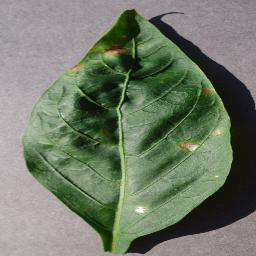

In [40]:
img

In [41]:
img=image.load_img("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/d301e0ad-26ae-424e-ace7-d38996e15660___JR_B.Spot 8932.JPG")


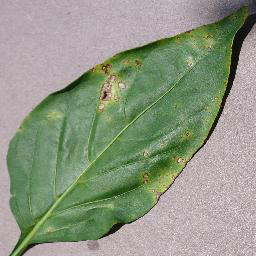

In [42]:
img

In [43]:
x=image.img_to_array(img)

In [44]:
x

array([[[177., 164., 171.],
        [173., 160., 167.],
        [170., 157., 164.],
        ...,
        [ 46.,  44.,  57.],
        [ 50.,  49.,  57.],
        [ 54.,  53.,  59.]],

       [[178., 165., 172.],
        [174., 161., 168.],
        [171., 158., 165.],
        ...,
        [ 47.,  45.,  58.],
        [ 48.,  47.,  55.],
        [ 49.,  48.,  54.]],

       [[179., 166., 173.],
        [175., 162., 169.],
        [171., 158., 165.],
        ...,
        [ 48.,  46.,  59.],
        [ 46.,  44.,  55.],
        [ 43.,  42.,  50.]],

       ...,

       [[185., 176., 177.],
        [184., 175., 176.],
        [186., 175., 179.],
        ...,
        [184., 172., 176.],
        [191., 179., 183.],
        [222., 210., 214.]],

       [[183., 177., 177.],
        [182., 173., 176.],
        [183., 172., 176.],
        ...,
        [200., 188., 192.],
        [187., 175., 179.],
        [205., 193., 197.]],

       [[183., 177., 177.],
        [179., 173., 175.],
        [181., 1

In [45]:
x=np.expand_dims(x,axis=0)

In [46]:
x

array([[[[177., 164., 171.],
         [173., 160., 167.],
         [170., 157., 164.],
         ...,
         [ 46.,  44.,  57.],
         [ 50.,  49.,  57.],
         [ 54.,  53.,  59.]],

        [[178., 165., 172.],
         [174., 161., 168.],
         [171., 158., 165.],
         ...,
         [ 47.,  45.,  58.],
         [ 48.,  47.,  55.],
         [ 49.,  48.,  54.]],

        [[179., 166., 173.],
         [175., 162., 169.],
         [171., 158., 165.],
         ...,
         [ 48.,  46.,  59.],
         [ 46.,  44.,  55.],
         [ 43.,  42.,  50.]],

        ...,

        [[185., 176., 177.],
         [184., 175., 176.],
         [186., 175., 179.],
         ...,
         [184., 172., 176.],
         [191., 179., 183.],
         [222., 210., 214.]],

        [[183., 177., 177.],
         [182., 173., 176.],
         [183., 172., 176.],
         ...,
         [200., 188., 192.],
         [187., 175., 179.],
         [205., 193., 197.]],

        [[183., 177., 177.],
       

In [61]:
y=image.img_to_array(img)

In [62]:
y

array([[[177., 164., 171.],
        [173., 160., 167.],
        [170., 157., 164.],
        ...,
        [ 46.,  44.,  57.],
        [ 50.,  49.,  57.],
        [ 54.,  53.,  59.]],

       [[178., 165., 172.],
        [174., 161., 168.],
        [171., 158., 165.],
        ...,
        [ 47.,  45.,  58.],
        [ 48.,  47.,  55.],
        [ 49.,  48.,  54.]],

       [[179., 166., 173.],
        [175., 162., 169.],
        [171., 158., 165.],
        ...,
        [ 48.,  46.,  59.],
        [ 46.,  44.,  55.],
        [ 43.,  42.,  50.]],

       ...,

       [[185., 176., 177.],
        [184., 175., 176.],
        [186., 175., 179.],
        ...,
        [184., 172., 176.],
        [191., 179., 183.],
        [222., 210., 214.]],

       [[183., 177., 177.],
        [182., 173., 176.],
        [183., 172., 176.],
        ...,
        [200., 188., 192.],
        [187., 175., 179.],
        [205., 193., 197.]],

       [[183., 177., 177.],
        [179., 173., 175.],
        [181., 1

In [63]:
y=np.expand_dims(x,axis=0)

In [64]:
y

array([[[[[177., 164., 171.],
          [173., 160., 167.],
          [170., 157., 164.],
          ...,
          [ 46.,  44.,  57.],
          [ 50.,  49.,  57.],
          [ 54.,  53.,  59.]],

         [[178., 165., 172.],
          [174., 161., 168.],
          [171., 158., 165.],
          ...,
          [ 47.,  45.,  58.],
          [ 48.,  47.,  55.],
          [ 49.,  48.,  54.]],

         [[179., 166., 173.],
          [175., 162., 169.],
          [171., 158., 165.],
          ...,
          [ 48.,  46.,  59.],
          [ 46.,  44.,  55.],
          [ 43.,  42.,  50.]],

         ...,

         [[185., 176., 177.],
          [184., 175., 176.],
          [186., 175., 179.],
          ...,
          [184., 172., 176.],
          [191., 179., 183.],
          [222., 210., 214.]],

         [[183., 177., 177.],
          [182., 173., 176.],
          [183., 172., 176.],
          ...,
          [200., 188., 192.],
          [187., 175., 179.],
          [205., 193., 197.]],



In [98]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 28ms/step


In [58]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [59]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight'
,'Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [76]:
'Potato___Late_blight'

'Potato___Late_blight'

In [99]:
index[y[0]]

'Peach___healthy'

In [103]:
img=image.load_img("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b8803558-9e0f-404e-80b3-c78d0bc7f6d0___RS_Early.B 7548.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 28ms/step


'Tomato___Bacterial_spot'

In [81]:
img=image.load_img("/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b8803558-9e0f-404e-80b3-c78d0bc7f6d0___RS_Early.B 7548.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 273ms/step


'Peach___healthy'

In [86]:
test_datagen_1=ImageDataGenerator(rescale=1)


In [90]:
test_generator_1=test_datagen_1.flow_from_directory( "/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(128,128),batch_size=20, class_mode='categorical')

Found 3416 images belonging to 9 classes.
